# Preprocessing
> 수집한 데이터를 머신러닝 알고리즘을 운용할 수 있는 형태로 가공하는 작업을 지칭합니다.  
데이터의 분할, 결측치, 범주형 데이터, 클래스 불균형 등 일반적인 데이터에서 발생 가능한 문제를 해결하는 일반적인 방법론을 지칭 하기도 합니다.  
다만 데이터의 특성 및 사용해야 하는 모델 케이스에 따라 수행해야하는 전처리 과정이 달라 기술적인 어려움이 있습니다.  
이번 시간에는 기본적인 전처리 방법들을 소개하고 샘플데이터에 적용하며 전처리 방법을 익혀 보겠습니다.  

## titanic 데이터 설명
> 타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터입니다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급  
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## 결측 데이터 처리

In [1]:
!pip install pandas, seaborn

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [57]:
# 필요모듈 import
import pandas as pd 


In [58]:
# 타이타닉 데이터 로드
df = pd.read_csv('./data/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<Axes: >

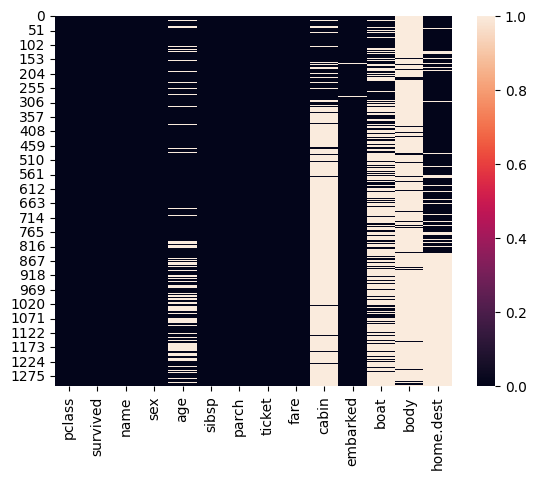

In [59]:
# 결측 데이터 분포 시각화

import seaborn as sns

sns.heatmap(df.isna())


# 상관관계분석


이 중 cabin, home.dest 컬럼 데이터의 경우 결측치 비중이 높고 주변 데이터로부터 빈 데이터를 유추할 수 있는 힌트가 없어 삭제 처리 합니다.

In [60]:
# 여러가지 방법으로 컬럼 삭제
del df['cabin']

In [61]:
df = df.drop('home.dest', axis=1)

In [62]:
# 팬시 인덱싱
a= df.pop('ticket')

a

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1304      2665
1305      2665
1306      2656
1307      2670
1308    315082
Name: ticket, Length: 1309, dtype: object

In [63]:
# 결측 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
 9   boat      486 non-null    object 
 10  body      121 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [64]:
# age, fare, embarked 컬럼의 빈칸 채우기
# age 결측치 비율이 높지 않고 유의수준 안의 샘플 갯수이기에 평균값으로 결측치를 채워넣습니다.
df['age'].fillna(df['age'].mean(), inplace=True)
# 판다스 사용 결측치 채우기
df['fare'].fillna(df['fare'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18356\437717253.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18356\437717253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [65]:
# 컬럼 고윳값 카운트
# 컬럼의 고윳값을 계산해서 내림차순으로 정렬 함수
df['embarked'].unique()
df['embarked'].value_counts()

# 최빈값 확인
df['embarked'].mode()

# df['embarked'].fillna(df['embarked'].mode(), inplace=True)

0    S
Name: embarked, dtype: object

In [66]:
# 최빈값 확인 및 결측치 채우기
mode_value = df['embarked'].mode()[0]  # 최빈값의 첫 번째 항목 선택
df['embarked'].fillna(mode_value, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18356\1654657004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(mode_value, inplace=True)


boat, body의 경우 유추하여 값을 채워 넣을 수 있는 데이터는 없지만 데이터의 존재 자체로서 생존 여부를 판단 할 수 있는 데이터이기에 데이터를 명목화 시키겠습니다.

## 범주형 변수의 처리
> 카테고리컬 데이터라고도 하며 데이터가 특정 구간에 속하여 구분이 가능한 데이터 분포를 보이는 변수의 경우 범주형 데이터라 한다.  
범주형 데이터의 경우 보통 문자열 구분이 되어있어 이를 컴퓨터가 인식 가능한 숫자형태로 바꿔주는데 더미화, 혹은 원핫인코딩이라는 형태로 변경한다.  

In [67]:
# 보트 컬럼의 결측치 여부를 이진형 데이터로 치환
df['boat']=df['boat'].isna()

In [68]:
df['boat']

0       False
1       False
2        True
3        True
4        True
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Name: boat, Length: 1309, dtype: bool

In [69]:
# True, False 변환
df['body']=df['body'].isna()

In [70]:
df['body']

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool

In [71]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S,False,True
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,False,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S,True,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S,True,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S,True,True


In [72]:
# 컬럼데이터가 True면 1, False면 0 으로 변환하는 커스텀함수 제작


In [73]:
# 컬럼데이터에 위에서 제작한 커스텀함수 적용


### 카테고리가 여러개인 변수 처리

In [74]:
# 데이터 타입을 str 로 변경.
# 결측치 데이터의 경우 데이터타입 float 혹시모를 경우에 대비해서 데이터타입 변경
df['name'] = df['name'].astype(str)

이름의 경우 미들네임에 따라 생존에 영향을 줄 수 있는 경우가 있습니다. 전체 미들네임에 해당하는 카테고리를 선택하지 않고 일부만을 데이터화 시킵니다.

In [75]:
# name 컬럼 첫번째 인덱스 데이터 선택해서 test_text로 저장
test = df.loc[0, 'name']
test

'Allen, Miss. Elisabeth Walton'

In [76]:
# 선별텍스트에서 문자열만 선택
test.split()[1]

'Miss.'

In [77]:
# 미들네임 선택 함수
def make_name(x):
    return x.split()[1]

In [78]:
# 미들네임 선택 함수 적용 후 name 컬럼 원본값 변경. numpy vector에 함수 적용하여 일괄 변경. 연산이 빠름.
df['name'] = df['name'].apply(make_name)

In [79]:
# name 컬럼의 문자열 그대로는 학습에 사용이 불가능하기에 이를 다시 숫자형태로 치환 + 기타 미들네임을 0으로 변환
df_uniq = df['name'].unique()

type(df_uniq[0])

str

In [80]:
# 커스텀함수 적용
def make_name2(x):
    if x == df_uniq[0]:
        return 1
    elif x == df_uniq[1] :
        return 2
    elif x == df_uniq[2] :
        return 3
    elif x == df_uniq[3] :
        return 4
    else :
        return 0

In [83]:
# ticket 컬럼 삭제 (티켓 고유넘버값이라 생존율에 영향 X)
# df['name'].apply(make_name2)
df['name'] = df['name'].apply(make_name2)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body
0,1,1,1,female,29.00,0,0,211.3375,S,False,True
1,1,1,2,male,0.92,1,2,151.5500,S,False,True
2,1,0,1,female,2.00,1,2,151.5500,S,True,True
3,1,0,3,male,30.00,1,2,151.5500,S,True,False
4,1,0,4,female,25.00,1,2,151.5500,S,True,True


In [86]:
# 데이터프레임 내부에 카테고리컬 컬럼을 원핫인코딩 변환 작업
df = pd.get_dummies(df, columns=['pclass', 'name', 'sex', 'embarked'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,boat,body,pclass_2,pclass_3,name_1,name_2,name_3,name_4,sex_male,embarked_Q,embarked_S
0,1,29.00,0,0,211.3375,False,True,False,False,True,False,False,False,False,False,True
1,1,0.92,1,2,151.5500,False,True,False,False,False,True,False,False,True,False,True
2,0,2.00,1,2,151.5500,True,True,False,False,True,False,False,False,False,False,True
3,0,30.00,1,2,151.5500,True,False,False,False,False,False,True,False,True,False,True
4,0,25.00,1,2,151.5500,True,True,False,False,False,False,False,True,False,False,True


## 시간형데이터 처리

In [87]:
# 테스트 데이터 생성
df1 = pd.DataFrame(pd.date_range('2022-01-01', periods =400, freq='H'), columns=['datetime'])
df1["datetime"]

C:\Users\User\AppData\Local\Temp\ipykernel_18356\355119924.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1 = pd.DataFrame(pd.date_range('2022-01-01', periods =400, freq='H'), columns=['datetime'])


0     2022-01-01 00:00:00
1     2022-01-01 01:00:00
2     2022-01-01 02:00:00
3     2022-01-01 03:00:00
4     2022-01-01 04:00:00
              ...        
395   2022-01-17 11:00:00
396   2022-01-17 12:00:00
397   2022-01-17 13:00:00
398   2022-01-17 14:00:00
399   2022-01-17 15:00:00
Name: datetime, Length: 400, dtype: datetime64[ns]

In [88]:
# integer location, time differnece.
df1.iloc[5,0] - df1.iloc[0,0]

Timedelta('0 days 05:00:00')

In [92]:
df1['year'] = df1['datetime'].dt.year
df1

df1['datetime'].dt.dayofweek # categorical data로 처리하는게 나음.

0      5
1      5
2      5
3      5
4      5
      ..
395    0
396    0
397    0
398    0
399    0
Name: datetime, Length: 400, dtype: int32

## 타겟, 학습데이터 분할

In [93]:
# 타겟데이터 분할

y=df['survived']
X=df.drop('survived', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 학습데이터 분할


## 스케일 조정
> 사용해야 하는 머신러닝 모델의 특징에 따라 학습 및 테스트에 필요한 데이터의 스케일 보정이 필요한 경우가 있습니다.  
이는 스케일이 큰 설명변수의 영향력이 비대해지는 문제를 방지하기 위해 사용합니다.

가장 일반적으로 사용하는 스케일 보정 방법론 두가지를 사용해보겠습니다.

> - normalization
>> 설명변수의 범위를 0~1 사이로 조정
> - standardization  
>> 설명변수의 범위를 평균 0, 분산이 1이 되도록 조정, 정규분포를 표준 정규분포화 시키는 것과 같음.

In [94]:
# 스케일러 모델 로딩
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [95]:
# 모델 생성
scaler = MinMaxScaler()

In [96]:
# 모델 학습
scaler.fit(X_train)

MinMaxScaler()

In [98]:
# 원 데이터 변환
scaled_X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [99]:
# 변환 데이터 확인
scaled_X_train

,age,sibsp,parch,fare,boat,body,pclass_2,pclass_3,name_1,name_2,name_3,name_4,sex_male,embarked_Q,embarked_S
0,0.372180,0.0,0.000000,0.016908,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.323563,0.0,0.000000,0.015412,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.235876,0.0,0.000000,0.050749,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.372180,1.0,0.222222,0.135753,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.348616,0.0,0.000000,0.015176,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.372180,0.0,0.000000,0.014891,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
912,0.223350,0.0,0.000000,0.015176,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
913,0.354879,0.0,0.000000,0.031425,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
914,0.323563,0.0,0.000000,0.015469,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
# test 데이터에 적용


## 클래스 불균형 (imbalance data)
> 모델링 프로젝트를 진행하는 도중 실제 문제에 굉장히 빈번하게 발생하지만 해결이 어려운 문제가 클래스 불균형 문제입니다.  
이는 학습에 필요한 충분한 클래스의 샘플 수를 확보하지 못해 모델의 결과값이 샘플 수가 큰 클래스로 편향되는 문제를 발생 시킵니다.  
ex) 1000개 샘플 중 10개의 오류를 모두 정상이라 판별해도 acc는 99%입니다.  
타겟 데이터의 불균형 문제를 해결하기 위한 방법으로 oversampling / undersampling을 활용 할 수 있습니다.

> - oversampling
>> 타겟데이터 클래스 샘플 수를 크기가 큰 타겟데이터 클래스 샘플 수와 같은 갯수로 생성
> - undersampling
>> 타겟데이터 클래스 샘플 수를 크기가 작은 타겟데이터 클래스 샘플 수와 같게 샘플 삭제

In [100]:
# imblearn 설치
!pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   -------------- ------------------------- 92.2/258.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3


In [101]:
# SMOTE import
from imblearn.over_sampling import SMOTE

In [102]:
# oversampling 적용
# imblearn oversampling SMOTE (Synthetic Minority Oversampling Technique)
smt = SMOTE()

In [103]:
over_X_train, over_y_train = smt.fit_resample(X_train, y_train)

In [104]:
over_X_train

,age,sibsp,parch,fare,boat,body,pclass_2,pclass_3,name_1,name_2,name_3,name_4,sex_male,embarked_Q,embarked_S
0,29.881138,0,0,8.662500,True,True,False,True,False,False,True,False,True,False,True
1,26.000000,0,0,7.895800,True,True,False,True,False,False,True,False,True,False,True
2,19.000000,0,0,26.000000,False,True,True,False,True,False,False,False,False,False,True
3,29.881138,8,2,69.550000,True,True,False,True,True,False,False,False,False,False,True
4,28.000000,0,0,7.775000,True,True,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,37.033390,1,0,56.809557,False,True,False,False,False,False,False,True,False,False,True
1166,24.713861,1,1,29.141584,False,True,True,False,True,False,False,True,False,False,True
1167,29.080884,1,0,24.086189,False,True,True,True,True,False,False,True,False,True,False
1168,29.881138,1,0,51.893523,False,True,False,False,False,False,False,True,False,False,True


## 모델학습

In [97]:
# 모델 생성


In [98]:
# 모델 학습


/Users/byun/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
# 예측값 저장


In [100]:
# 분류평가표 출력


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       203
           1       0.97      0.96      0.97       203

    accuracy                           0.97       406
   macro avg       0.97      0.97      0.97       406
weighted avg       0.97      0.97      0.97       406



In [ ]:
## 전날 실습 코드

from itertools import product
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer()

X = cancer['data']
y = abs(cancer['target'] - 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

model_list = [lr, dtc, rfc]

best_score = 0
best_est = None

for est in model_list:
    est.fit(X_train2, y_train2)
    pred = est.predict(X_val)
    recall = recall_score(y_val, pred)
    if recall > best_score:
        best_score = recall
        best_est = est

print(best_est)

est = [100]
depth = [4, 5, 6]

best_param_score = 0
best_param_grid = None

for param in product(est, depth):
    model = RandomForestClassifier(n_estimators=param[0], max_depth=param[1], random_state=42)
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    recall = recall_score(y_val, pred)
    if recall > best_param_score:
        best_param_score = recall
        best_param_grid = param

best_model = RandomForestClassifier(n_estimators=best_param_grid[0], 
                                    max_depth=best_param_grid[1], 
                                    random_state=42)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, best_pred))